In [3]:
import sympy.functions.special.gamma_functions as sy
import matplotlib.pyplot as plt
import math
import numpy as np
import random as random
import matplotlib.image as mpimg

In [4]:
def trunc( list, float):
   temp2 = np.asarray(list)[np.where(np.asarray(Mag[0][:]) < float)] 
   return temp2;

Brief outline of derivation following Churchill+99:

$$ \frac{dN}{dX} =  \frac{c \sigma n}{H_0} $$

The 'column density' $n\sigma$ is given by

$$ n \sigma = \pi \int_{L_\text{min}}^\infty f_R(L) \Phi(L) R^2(L) dL $$

$\Phi(L)$ and $R(L)$ are givan by a Schechter and a PL, respectively:

$$ \Phi(L) dL = \Phi^* (L/L^*)^\alpha \text{exp} (-L/L^*) dL$$
$$ R(L) = R^* (L/L^*)^\beta $$

Grouping together:

$$ n \sigma = \pi \int_{L_\text{min}}^\infty \Phi^* R^{*^2} (L/L^*)^{\alpha+2\beta} \text{exp} (-L/L^*)dL $$
$$ = \pi \Phi^* R^{*^2} \Gamma(\alpha+2\beta+1 , L_\text{min}/L^*) $$

And finally

$$ \frac{dN}{dX} = f_R(L)\frac{c \pi}{H_0} \Phi^* R^{*^2} \Gamma(\alpha+2\beta+1 , L_\text{min}/L^*) $$

and now only the $\Gamma$ function depends on $L_\text{min}$. 

# For z=5:

In [44]:
c = 3E8
H0 = 2.1916E-18
meters_to_kpc = 3.086E19


beta = 0.5
alpha = -1.75
R_star = 137*meters_to_kpc
f_R = 1
phi_star = (10.0**(-3.12))/((1000.0*meters_to_kpc)**3.0)

gamma_arg = alpha+(2.0*beta)+1.0

In [45]:
l_ratio = [0.001,0.005,0.01,0.03,0.06,0.1,0.2,0.5,0.6,0.7,1.0,1.5]
dNdX = [0]*len(l_ratio)

In [46]:
for i in range(len(l_ratio)):
    dNdX[i] = (c*math.pi/H0)*f_R*(R_star**2)*phi_star*sy.uppergamma(gamma_arg,l_ratio[i])

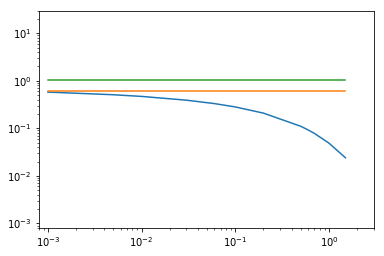

In [47]:
a=[0.8-0.18]*len(l_ratio)
b=[0.86+0.19]*len(l_ratio)
plt.plot(l_ratio,dNdX,l_ratio,a,l_ratio,b)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0008,30)
plt.xlim(0.0008,3.0)
plt.show()

In [7]:
c = 3E8
H0 = 2.1916E-18
meters_to_kpc = 3.086E19


beta_arr = [0.1,0.23,0.3,0.4]
alpha = -1.67
R_star = 75.0*meters_to_kpc
f_R = 1.0
phi_star = (10.0**(-3.12))/((1000.0*meters_to_kpc)**3.0)



In [255]:
l_ratio_min = [0.0001,0.0005,0.001,0.005,0.01,0.03,0.06,0.1,0.2,0.5,0.6,0.7,1.0,1.5]

dNdX_obs = 1.03
L_bol = 3.828E26
M_bol = 4.8
M_star = -21.2
L_star = L_bol*(10**((M_bol-M_star)/2.5))

R_star_predicted =  [[0 for x in range(len(l_ratio_min))] for y in range(len(beta_arr))]
R_predicted_full =  [[0 for x in range(len(l_ratio_min))] for y in range(len(beta_arr))]
R_predicted = [[0 for x in range(len(l_ratio_min))] for y in range(len(beta_arr))]
Mag =  [[0 for x in range(len(l_ratio_min))] for y in range(len(beta_arr))]
for b in range(len(beta_arr)):
    beta = beta_arr[b]
    gamma_arg = alpha+(2.0*beta)+1.0
    for i in range(len(l_ratio_min)):
        R_star_predicted[b][i] = (1.0/meters_to_kpc)*math.sqrt(dNdX_obs*(H0/(c*math.pi))*(1/f_R)*(1/phi_star)*(1/sy.uppergamma(gamma_arg,l_ratio_min[i])))
        Mag[b][i] = M_bol - (2.5*math.log10(l_ratio_min[i]*L_star/L_bol))
        R_predicted[b][i] = R_star_predicted[b][i]*(l_ratio_min[i]**beta)
        R_predicted_full[b][i] =[ R_star_predicted[b][i]*(x**beta) for x in l_ratio_min ]



In [262]:
print(L_star)
print(L_bol*(10**((M_bol+17.0)/2.5))/0.006)
print(L_bol*(10**((M_bol+25.3)/2.5))/9.7)

9.615501259818681e+36
3.348271596393554e+37
4.327132510140332e+37


# Allowed valuse of R* and R_{min}

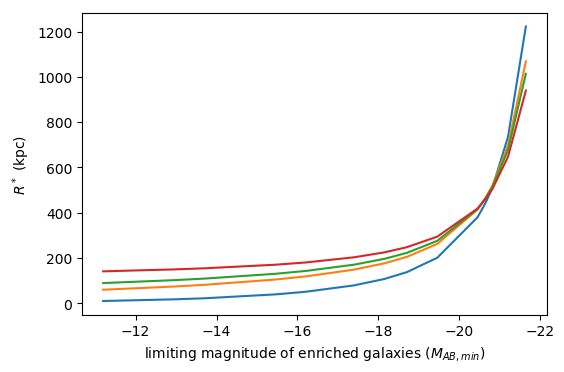

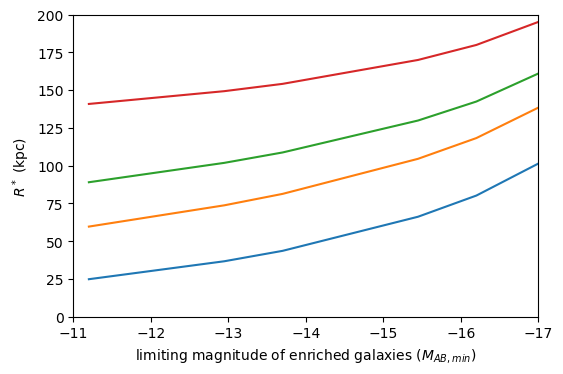

In [64]:
fig=plt.figure(figsize=(6, 4), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(Mag[0][:],R_predicted[0][:],Mag[1][:],R_star_predicted[1][:],Mag[2][:],R_star_predicted[2][:],Mag[3][:],R_star_predicted[3][:])
plt.gca().invert_xaxis()
plt.ylabel('$R^*$ (kpc)')
plt.xlabel('limiting magnitude of enriched galaxies ($M_{AB, min}$)')
plt.show()
fig=plt.figure(figsize=(6, 4), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(Mag[0][:],R_star_predicted[0][:],Mag[1][:],R_star_predicted[1][:],Mag[2][:],R_star_predicted[2][:],Mag[3][:],R_star_predicted[3][:])
plt.gca().invert_xaxis()
plt.ylabel('$R^*$ (kpc)')
plt.xlabel('limiting magnitude of enriched galaxies ($M_{AB, min}$)')
plt.xlim(-11,-17)
plt.ylim(0,200)
plt.show()





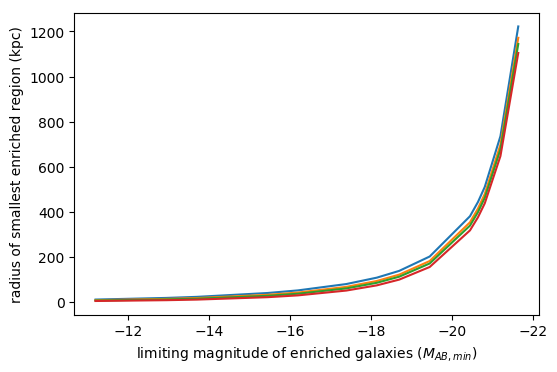

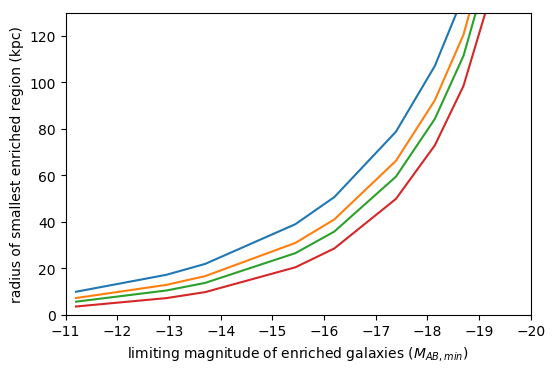

In [65]:
fig=plt.figure(figsize=(6, 4), dpi= 100, facecolor='w', edgecolor='k')


plt.plot(Mag[0][:],R_predicted[0][:],Mag[1][:],R_predicted[1][:],Mag[2][:],R_predicted[2][:],Mag[3][:],R_predicted[3][:])
plt.gca().invert_xaxis()
plt.ylabel('radius of smallest enriched region (kpc)')
plt.xlabel('limiting magnitude of enriched galaxies ($M_{AB,min}$)')
plt.show()
fig=plt.figure(figsize=(6, 4), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(Mag[0][:],R_predicted[0][:],Mag[1][:],R_predicted[1][:],Mag[2][:],R_predicted[2][:],Mag[3][:],R_predicted[3][:])
plt.gca().invert_xaxis()
plt.ylabel('radius of smallest enriched region (kpc)')
plt.xlabel('limiting magnitude of enriched galaxies ($M_{AB,min}$)')
plt.xlim(-11,-20)
plt.ylim(0,130)

plt.show()





# R (L) ranges of models

In [104]:
c = 3E8
H0 = 2.1916E-18
meters_to_kpc = 3.086E19
L_bol = 3.828E26
M_bol = 4.8
M_star = -21.2
L_star = L_bol*(10**((M_bol-M_star)/2.5))



alpha = -1.67
f_R = 1.0
phi_star = (10.0**(-3.12))/((1000.0*meters_to_kpc)**3.0)
dNdX_obs = 1.03



l_ratio_min = [0.0001,0.0005,0.001,0.005,0.01,0.03,0.06,0.1,0.2,0.5,0.6,0.7,1.0,1.5]
beta_arr = [0.1,0.23,0.3,0.4]



R_star_predicted =  [[0 for x in range(len(l_ratio_min))] for y in range(len(beta_arr))]
R_predicted_full =  [[0 for x in range(len(l_ratio_min))] for y in range(len(beta_arr))]
R_predicted = [[0 for x in range(len(l_ratio_min))] for y in range(len(beta_arr))]
Mag =  [[0 for x in range(len(l_ratio_min))] for y in range(len(beta_arr))]
for b in range(len(beta_arr)):
    beta = beta_arr[b]
    gamma_arg = alpha+(2.0*beta)+1.0
    for i in range(len(l_ratio_min)):
        R_star_predicted[b][i] = ((1.0/meters_to_kpc)*math.sqrt(dNdX_obs*(H0/(c*math.pi))*
            (1/f_R)*(1/phi_star)*(1/sy.uppergamma(gamma_arg,l_ratio_min[i]))))
        Mag[b][i] = M_bol - (2.5*math.log10(l_ratio_min[i]*L_star/L_bol))
        R_predicted[b][i] = R_star_predicted[b][i]*(l_ratio_min[i]**beta)
        R_predicted_full[b][i] =[ R_star_predicted[b][i]*(x**beta) for x in l_ratio_min ]


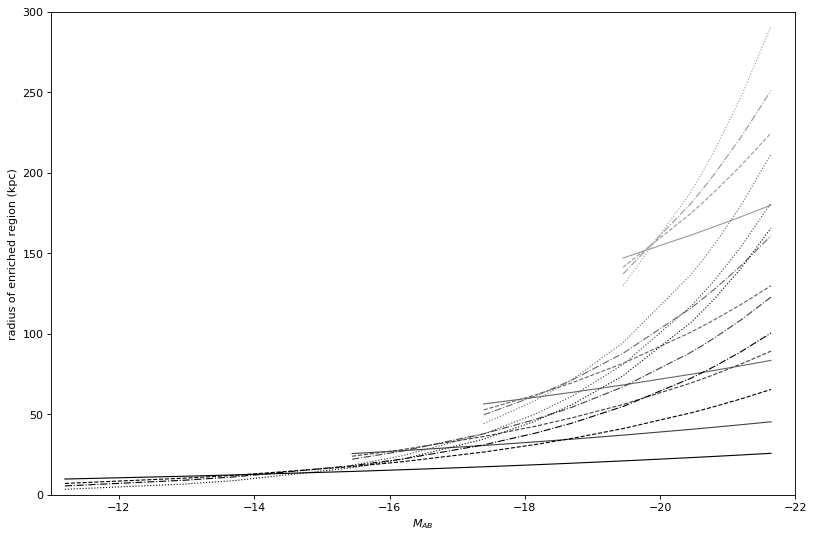

In [106]:
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')



plt.plot(Mag[0][:],R_predicted_full[0][0], color='#000000',linewidth=1.0)
plt.plot(trunc(Mag[0][:],-13.7),trunc(R_predicted_full[0][2],-13.7), color='#404040',linewidth=1.0)
plt.plot(trunc(Mag[0][:],-16.2),trunc(R_predicted_full[0][4],-16.2), color='#666666',linewidth=1.0)
plt.plot(trunc(Mag[0][:],-18.7),trunc(R_predicted_full[0][7],-18.7), color='#999999',linewidth=1.0)
plt.plot(Mag[1][:],R_predicted_full[1][0], '--',color='#000000',linewidth=1.0)
plt.plot(trunc(Mag[0][:],-13.7),trunc(R_predicted_full[1][2],-13.7), '--',color='#404040',linewidth=1.0)
plt.plot(trunc(Mag[0][:],-16.2),trunc(R_predicted_full[1][4],-16.2), '--',color='#666666',linewidth=1.0)
plt.plot(trunc(Mag[0][:],-18.7),trunc(R_predicted_full[1][7],-18.7), '--',color='#999999',linewidth=1.0)
plt.plot(Mag[2][:],R_predicted_full[2][0], '-.',color='#000000',linewidth=1.0)
plt.plot(trunc(Mag[0][:],-13.7),trunc(R_predicted_full[2][2],-13.7), '-.',color='#404040',linewidth=1.0)
plt.plot(trunc(Mag[0][:],-16.2),trunc(R_predicted_full[2][4],-16.2), '-.',color='#666666',linewidth=1.0)
plt.plot(trunc(Mag[0][:],-18.7),trunc(R_predicted_full[2][7],-18.7), '-.',color='#999999',linewidth=1.0)
plt.plot(Mag[2][:],R_predicted_full[3][0], ':',color='#000000',linewidth=1.0)
plt.plot(trunc(Mag[0][:],-13.7),trunc(R_predicted_full[3][2],-13.7), ':',color='#404040',linewidth=1.0)
plt.plot(trunc(Mag[0][:],-16.2),trunc(R_predicted_full[3][4],-16.2), ':',color='#666666',linewidth=1.0)
plt.plot(trunc(Mag[0][:],-18.7),trunc(R_predicted_full[3][7],-18.7), ':',color='#999999',linewidth=1.0)

plt.gca().invert_xaxis()
plt.ylabel('radius of enriched region (kpc)')
plt.xlabel('$M_{AB}$')
plt.xlim(-11,-22)
plt.ylim(0,300)
plt.show()


In [122]:
phi_m15 = 0.000758
phi_b15 = 0.00079
phi_f15 = 0.000895

print((-1.75-1.76-1.67)/3.0)
print(math.sqrt((0.13**2)+(0.06**2)+(0.06**2))/3.0)

-1.7266666666666666
0.05174724898753341


In [132]:
print(10.0**(-3.12))

#alpha = -1.67
#f_R = 1.0
#phi_star = (10.0**(-3.12))/((1000.0*meters_to_kpc)**3.0)
#dNdX_obs = 1.03



0.0007585775750291835


In [158]:
def trunc2( list, float):
   temp2 = np.asarray(list)[np.where(np.asarray(Mag) < float)] 
   return temp2;

(200, 200)
90.0


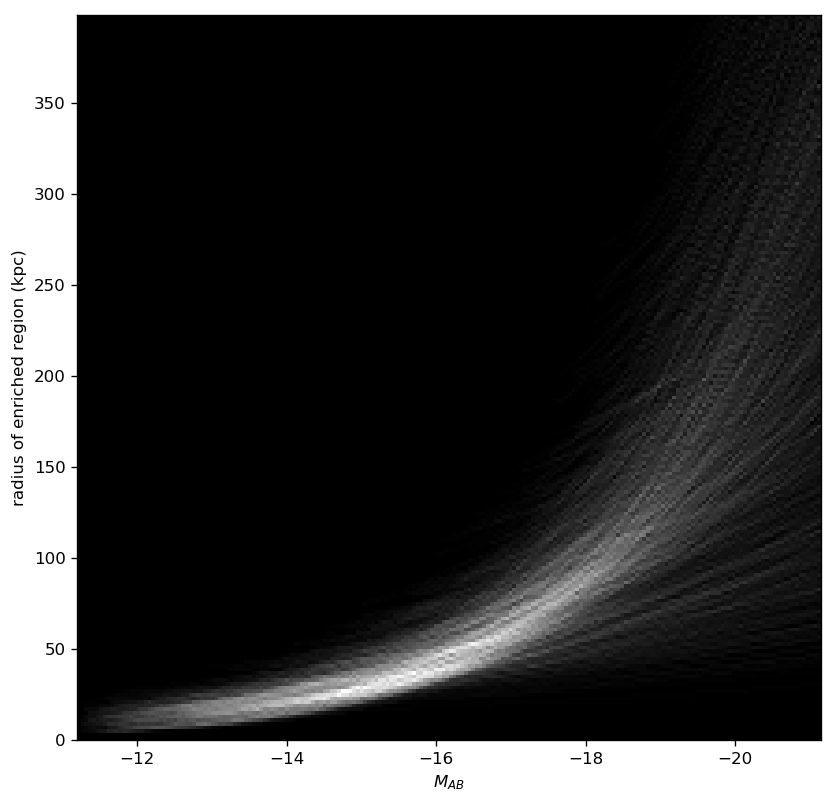

In [10]:


#plt.ylabel('radius of enriched region (kpc)')
#plt.xlabel('$M_{AB}$')
#plt.xlim(-11,-22)
#plt.ylim(0,300)

c = 3E8
H0 = 2.1916E-18
meters_to_kpc = 3.086E19
L_bol = 3.828E26
M_bol = 4.8
M_star = -21.2
L_star = L_bol*(10**((M_bol-M_star)/2.5))

log_ratio_arr = np.arange(-4, 0, 0.02)
l_ratio_arr = [10**x for x in log_ratio_arr ]
Mag = [ (M_bol - (2.5*math.log10(i*L_star/L_bol))) for i in l_ratio_arr]

R_arr = np.arange(0.0,400.0,2.0)
density_matrix =  [[0 for x in range(len(Mag))] for y in range(len(R_arr))]

for counter in range(2000):

    alpha = -1.67+(random.random()*(-1.77+1.67))
    f_R = 0.5+(random.random()*(1.0-0.5))
    phi_star = (0.0007+(random.random()*0.0003))/((1000.0*meters_to_kpc)**3.0)
    dNdX_obs = 0.72 + (random.random()*(1.05-0.72))
    beta = 0.1 + (random.random()*0.4)
    log_ratio = -4+(4*random.random())
    l_ratio_min = 10**log_ratio
    #l_ratio_min = 0.0001 + (random.random()*0.1)
    M_min = M_bol - (2.5*math.log10(l_ratio_min*L_star/L_bol))
    trun_Mag = np.asarray(Mag)[np.where(np.asarray(Mag) < M_min)] 
    gamma_arg = alpha+(2.0*beta)+1.0
    R_star_predicted = ((1.0/meters_to_kpc)*math.sqrt(dNdX_obs*(H0/(c*math.pi))*
        (1/f_R)*(1/phi_star)*(1/sy.uppergamma(gamma_arg,l_ratio_min))))
    R_predicted = R_star_predicted*(l_ratio_min**beta)
    R_predicted_full =[ R_star_predicted*(x**beta) for x in l_ratio_arr ]
    trun_R = np.asarray(R_predicted_full)[np.where(np.asarray(Mag) < M_min)]

    #plt.plot(trun_Mag, trun_R, color='#404040',linewidth=1.0 )
    
    #print(len(trun_Mag),len(trun_R), len(R_arr), len(Mag), len(density_matrix))
    
    for loc in range(len(trun_Mag)):
        R_index = math.floor(trun_R[loc]) if (math.floor(trun_R[loc])<len(R_arr)) else len(R_arr)-1
        M_index = np.where(np.asarray(Mag) == trun_Mag[loc])[0][0]
        #print(R_index, M_index)
        density_matrix[R_index][M_index] = (density_matrix[R_index][M_index] +
            1.0) if (math.floor(trun_R[loc])<len(R_arr)) else density_matrix[R_index][M_index]
    

print(np.shape(density_matrix))
print(np.amax(density_matrix))


fig=plt.figure(figsize=(8, 8), dpi= 120, facecolor='w', edgecolor='k')


plt.imshow(density_matrix, extent=[-11.2,-21.15,398,0], aspect="auto",cmap=plt.cm.get_cmap('gist_gray'))
plt.ylabel('radius of enriched region (kpc)')
plt.xlabel('$M_{AB}$')

#cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])

#plt.figure()
#CS = plt.contour(Mag, R_arr, density_matrix)
#plt.clabel(CS, inline=1, fontsize=10)

#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


plt.show()



90.0


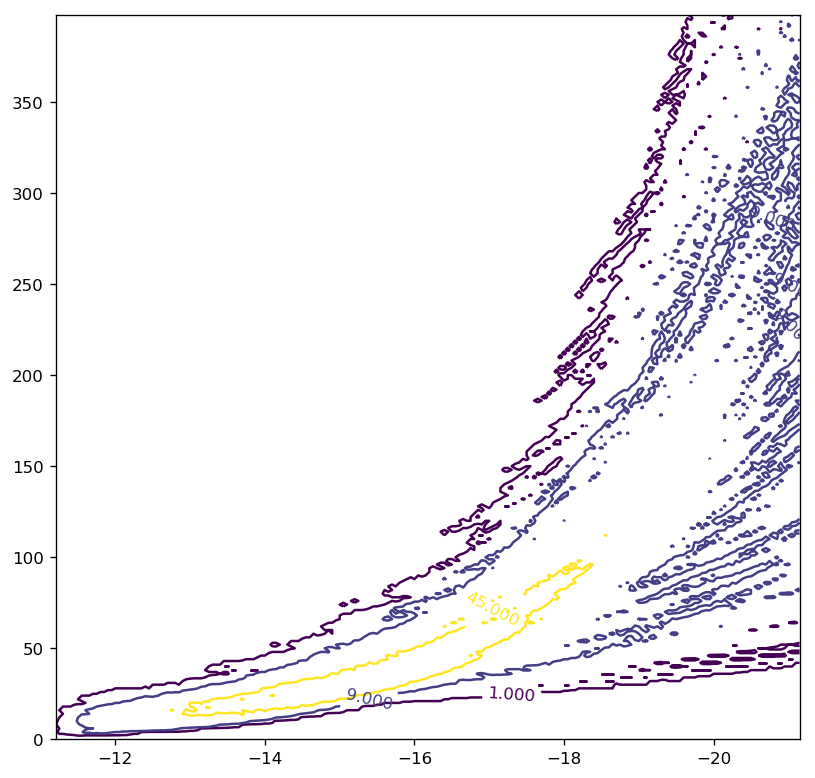

-21.15000000000001 -11.2 0.0 398.0


In [12]:
fig=plt.figure(figsize=(8, 8), dpi= 120, facecolor='w', edgecolor='k')
ll = np.amax(density_matrix)
CS = plt.contour(Mag, R_arr, density_matrix, [1.0,ll*0.1,ll*0.5])
print(ll)
plt.clabel(CS, inline=1, fontsize=10)
plt.gca().invert_xaxis()
plt.show()

print(min(Mag), max(Mag), min(R_arr),max(R_arr))


(200, 200)
75.0


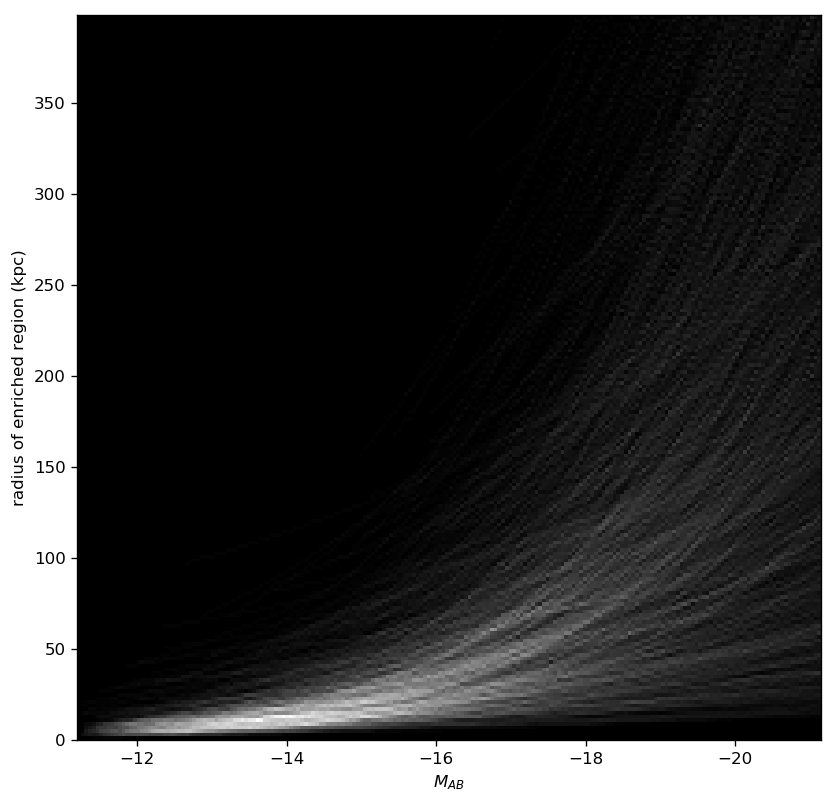

In [13]:


#plt.ylabel('radius of enriched region (kpc)')
#plt.xlabel('$M_{AB}$')
#plt.xlim(-11,-22)
#plt.ylim(0,300)

c = 3E8
H0 = 2.1916E-18
meters_to_kpc = 3.086E19
L_bol = 3.828E26
M_bol = 4.8
M_star = -21.2
L_star = L_bol*(10**((M_bol-M_star)/2.5))

log_ratio_arr = np.arange(-4, 0, 0.02)
l_ratio_arr = [10**x for x in log_ratio_arr ]
Mag = [ (M_bol - (2.5*math.log10(i*L_star/L_bol))) for i in l_ratio_arr]

R_arr = np.arange(0.0,400.0,2.0)
density_matrix =  [[0 for x in range(len(Mag))] for y in range(len(R_arr))]

for counter in range(2000):

    alpha = -1.83+(random.random()*(-2.24+1.83))
    f_R = 0.5+(random.random()*(1.0-0.5))
    phi_star = (0.00004+(random.random()*0.0008))/((1000.0*meters_to_kpc)**3.0)
    dNdX_obs = 0.5 + (random.random()*(1.75-0.5))
    beta = 0.1 + (random.random()*0.4)
    log_ratio = -4+(4*random.random())
    l_ratio_min = 10**log_ratio
    #l_ratio_min = 0.0001 + (random.random()*0.1)
    M_min = M_bol - (2.5*math.log10(l_ratio_min*L_star/L_bol))
    trun_Mag = np.asarray(Mag)[np.where(np.asarray(Mag) < M_min)] 
    gamma_arg = alpha+(2.0*beta)+1.0
    R_star_predicted = ((1.0/meters_to_kpc)*math.sqrt(dNdX_obs*(H0/(c*math.pi))*
        (1/f_R)*(1/phi_star)*(1/sy.uppergamma(gamma_arg,l_ratio_min))))
    R_predicted = R_star_predicted*(l_ratio_min**beta)
    R_predicted_full =[ R_star_predicted*(x**beta) for x in l_ratio_arr ]
    trun_R = np.asarray(R_predicted_full)[np.where(np.asarray(Mag) < M_min)]

    #plt.plot(trun_Mag, trun_R, color='#404040',linewidth=1.0 )
    
    #print(len(trun_Mag),len(trun_R), len(R_arr), len(Mag), len(density_matrix))
    
    for loc in range(len(trun_Mag)):
        R_index = math.floor(trun_R[loc]) if (math.floor(trun_R[loc])<len(R_arr)) else len(R_arr)-1
        M_index = np.where(np.asarray(Mag) == trun_Mag[loc])[0][0]
        #print(R_index, M_index)
        density_matrix[R_index][M_index] = (density_matrix[R_index][M_index] +
            1.0) if (math.floor(trun_R[loc])<len(R_arr)) else density_matrix[R_index][M_index]
    

print(np.shape(density_matrix))
print(np.amax(density_matrix))


fig=plt.figure(figsize=(8, 8), dpi= 120, facecolor='w', edgecolor='k')


plt.imshow(density_matrix, extent=[-11.2,-21.15,398,0], aspect="auto",cmap=plt.cm.get_cmap('gist_gray'))
plt.ylabel('radius of enriched region (kpc)')
plt.xlabel('$M_{AB}$')

#cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])

#plt.figure()
#CS = plt.contour(Mag, R_arr, density_matrix)
#plt.clabel(CS, inline=1, fontsize=10)

#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


plt.show()



-0.00018377223398316207
